In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
df = pd.read_csv('data_1.5_merged.csv', low_memory = False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df[(df['Rnk'] == 1)].head(20).sort_values("Date")

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Rnk,GC,Rider,Age,Team,Name,Stage,Date,Avg. speed winner,ProfileScore,Distance,RaceRanking,Sprint_pts,Climb_pts,Oneday_pts,GC_pts,Sprint_cumsum,Climb_cumsum,Oneday_cumsum,GC_cumsum,Year,Month,Day,Sprint_current_season,Sprint_2011_sum,Climb_2011_sum,Oneday_2011_sum,GC_2011_sum,Sprint_2012_sum,Climb_2012_sum,Oneday_2012_sum,GC_2012_sum,Sprint_2013_sum,Climb_2013_sum,Oneday_2013_sum,GC_2013_sum,Sprint_2014_sum,Climb_2014_sum,Oneday_2014_sum,GC_2014_sum,Sprint_2015_sum,Climb_2015_sum,Oneday_2015_sum,GC_2015_sum,Sprint_2016_sum,Climb_2016_sum,Oneday_2016_sum,GC_2016_sum,Sprint_2017_sum,Climb_2017_sum,Oneday_2017_sum,GC_2017_sum,Sprint_2018_sum,Climb_2018_sum,Oneday_2018_sum,GC_2018_sum,Sprint_2019_sum,Climb_2019_sum,Oneday_2019_sum,GC_2019_sum,Sprint_2020_sum,Climb_2020_sum,Oneday_2020_sum,GC_2020_sum,Climb_current_season,Oneday_current_season,GC_current_season
107,107,107,225730,1,NaN,1449,24.0,104,19,1,2011-01-18,42.002,0,138.0,34,50.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,2011,1,18,50.0,294.0,0.0,275.0,225.0,532.0,22.0,159.0,30.0,208.0,4.0,8.0,30.0,38.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,151,151,42862,1,NaN,199,23.0,57,65,2,2011-01-19,42.169,0,146.0,34,50.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,2011,1,19,50.0,213.0,0.0,5.0,195.0,313.0,0.0,0.0,25.0,5.0,0.0,0.0,5.0,202.0,0.0,160.0,30.0,2.0,0.0,48.0,5.0,115.0,1.0,220.0,20.0,91.0,12.0,104.0,45.0,0.0,0.0,19.0,13.0,15.0,19.0,26.0,34.0,25.0,43.0,11.0,80.0,0.0,0.0,0.0
296,296,296,109649,1,NaN,530,20.0,23,19,3,2011-01-20,40.358,0,129.0,34,50.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,2011,1,20,54.0,115.0,0.0,15.0,145.0,63.0,0.0,10.0,90.0,247.0,35.0,10.0,30.0,427.0,95.0,39.0,30.0,258.0,80.0,426.0,30.0,209.0,118.0,359.0,30.0,598.0,44.0,642.0,40.0,136.0,34.0,934.0,195.0,315.0,152.0,509.0,30.0,50.0,117.0,375.0,5.0,0.0,0.0,0.0
424,424,424,108576,1,NaN,527,23.0,79,19,4,2011-01-21,41.817,0,124.0,34,50.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,2011,1,21,50.0,65.0,0.0,0.0,275.0,68.0,10.0,10.0,75.0,74.0,0.0,10.0,100.0,50.0,0.0,10.0,15.0,11.0,0.0,5.0,15.0,0.0,0.0,0.0,65.0,0.0,0.0,120.0,5.0,4.0,0.0,21.0,18.0,0.0,0.0,3.0,15.0,0.0,0.0,8.0,10.0,0.0,0.0,0.0
608,608,608,67504,1,NaN,299,28.0,1,19,5,2011-01-22,42.220,0,131.0,34,50.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,2011,1,22,59.0,235.0,0.0,56.0,145.0,116.0,0.0,58.0,58.0,33.0,0.0,162.0,25.0,0.0,0.0,51.0,25.0,6.0,0.0,10.0,35.0,0.0,0.0,42.0,10.0,0.0,0.0,47.0,45.0,0.0,0.0,18.0,40.0,0.0,0.0,6.0,53.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
672,672,672,108578,1,NaN,527,23.0,79,19,-1,2011-01-23,0.000,0,0.0,34,0.0,0.0,0.0,250.0,50.0,0.0,0.0,250.0,2011,1,23,50.0,65.0,0.0,0.0,275.0,68.0,10.0,10.0,75.0,74.0,0.0,10.0,100.0,50.0,0.0,10.0,15.0,11.0,0.0,5.0,15.0,0.0,0.0,0.0,65.0,0.0,0.0,120.0,5.0,4.0,0.0,21.0,18.0,0.0,0.0,3.0,15.0,0.0,0.0,8.0,10.0,0.0,0.0,250.0
784,784,784,42867,1,3.0,199,23.0,57,65,6,2011-01-23,47.459,0,90.0,34,50.0,0.0,0.0,0.0,105.0,0.0,0.0,160.0,2011,1,23,105.0,213.0,0.0,5.0,195.0,313.0,0.0,0.0,25.0,5.0,0.0,0.0,5.0,202.0,0.0,160.0,30.0,2.0,0.0,48.0,5.0,115.0,1.0,220.0,20.0,91.0,12.0,104.0,45.0,0.0,0.0,19.0,13.0,15.0,19.0,26.0,34.0,25.0,43.0,11.0,80.0,0.0,0.0,160.0
1044,1044,1044,65787,1,NaN,296,24.0,49,11,1,2011-03-06,37.821,0,154.5,10,50.0,0.0,0.0,0.0,80.0,0.0,0.0,5.0,2011,3,6,80.0,201.0,32.0,25.0,40.0,134.0,133.0,0.0,276.0,101.0,0.0,10.0,35.0,50.0,0.0,0.0,25.0,0.0,18.0,5.0,40.0,63.0,196.0,5.0,65.0,59.0,130.0,3.0,68.0,50.0,75.0,3.0,65.0,97.0,210.0,3.0,86.0,15.0,60.0,0.0,60.0,0.0,0.0,5.0
1152,1152,1152,210980,1,NaN,1311,34.0,57,11,2,2011-03-07,39.577,0,198.5,10,50.0,0.0,0.0,0.0,91.0,0.0,0.0,5.0,2011,3,7,91.0,98.0,0.0,10.0,15.0,83.0,0.0,10.0,40.0,42.0,0.0,5.0,30.0,52.0,0.0,0.0,25.0,0.0,0.0,15.0,15.0,11.0,0.0,0.0,30.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1276,1276,1276,225739,1,NaN,1449,24.0,104,70,3,2011-03-08,38.258,0,202.0,10,50.0,0.0,0.0,0.0,194.0,0.0,0.0,190.0,2011,3,8,194.0,294.0,0.0,275.0,225.0,532.0,22.0,159.0,30.0,208.0,4.0,8.0,30.0,38.0

In [33]:
test = df[(df['Year'] == 2016)]
test = test[(test['Name'] == 11)]
set3 = test[(test['Stage'] == 1)].sort_values("Sprint_current_season", ascending = False)[:1]

In [84]:
dates = []
predicted = []

In [88]:
# compute the % of the winner being one with the highest amount of points in the current season
i = 0
for year in df.Year.unique():
    set1 = df[(df['Year'] == year)]
    print("Taking year "+str(year)+" .")
    for race in set1.Name.unique():
        set2 = set1[(set1['Name'] == race)]
        print("Taking race "+str(race)+" .")
        for stage in set2.Stage.unique():
            print("Taking stage "+str(stage)+" .")
        # now we have the data split into individual "days", need to sort the results according to the relevant metrix (sprint, oneday points etc.)
            if set2['Stage'].iloc[0] == 0: # oneday
                set3 = set2[(set2['Stage'] == stage)].sort_values("Oneday_current_season", ascending = False)[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])

            elif set2['Stage'].iloc[0] == -1: # GC:
                set3 = set2[(set2['Stage'] == stage)].sort_values("GC_current_season", ascending = False)[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])

            elif set2['ProfileScore'].iloc[0] >= 50: # Climb:
                set3 = set2[(set2['Stage'] == stage)].sort_values("GC_current_season", ascending = False)[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])

            else: # Sprint:
                set3 = set2[(set2['Stage'] == stage)].sort_values("Sprint_current_season", ascending = False)[:1]

                dates.append(set3['Date'].iloc[0])
                predicted.append(set3['Rnk'].iloc[0])


 race 1 .
Taking stage 1 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage -1 .
Taking stage 7 .
Taking race 20 .
Taking stage 0 .
Taking race 13 .
Taking stage 0 .
Taking race 3 .
Taking stage 0 .
Taking race 61 .
Taking stage 1 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage -1 .
Taking race 4 .
Taking stage 0 .
Taking race 14 .
Taking stage 0 .
Taking race 15 .
Taking stage 0 .
Taking race 16 .
Taking stage 0 .
Taking race 18 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage -1 .
Taking race 35 .
Taking stage 2 .
Taking stage 3 .
Taking stage 4 .
Taking stage 5 .
Taking stage 6 .
Taking stage 7 .
Taking stage 8 .
Taking stage 9 .
Taking stage 10 .
Taking stage 11 .
Taking stage 12 .
Taking stage 13 .
Taking stage 14 .
Taking stage 15 .
Taking stage 16 .
Taking stage 17 .
Taking stage 18 .
Taking stage 19 .
Taking stage 20 .
Taking st

In [91]:
results = {'Date': dates,
        'Predicted': predicted
        }
results = pd.DataFrame(results)

In [93]:
results.head(10)

,Date,Predicted
0,2011-01-18,0
1,2011-01-19,1
2,2011-01-18,0
3,2011-01-19,1
4,2011-01-20,0
5,2011-01-21,0
6,2011-01-22,0
7,2011-01-23,0
8,2011-01-18,1
9,2011-01-19,0


In [94]:
results.to_csv('predicted_winner_as_the_one_with_the_most_points.csv')

In [2]:
import pandas as pd
results = pd.read_csv('predicted_winner_as_the_one_with_the_most_points.csv', low_memory = False)
test = results.copy()
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month
GB=test.groupby([(test.Year),(test.Month)]).mean()
GB.head(25)
GB.to_csv('mean_predicted.csv')

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


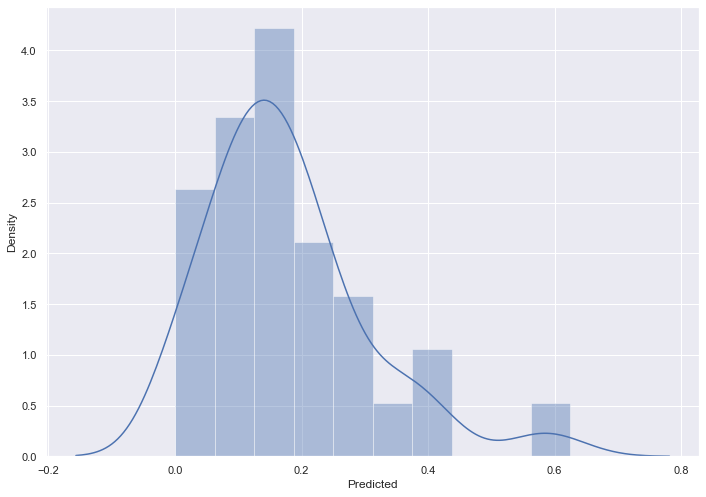

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(GB['Predicted'])
# we can see that most of the time, this approach is not great.
plt.savefig('./graphs/fig1.png')

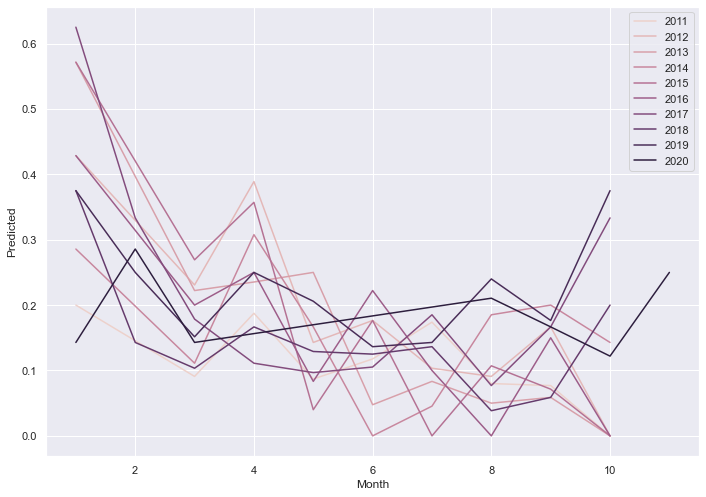

In [32]:
GB.reset_index()
sns.lineplot(x='Month',y='Predicted',hue='Year',data=GB)
plt.legend(labels=['2011', '2012','2013', '2014','2015', '2016','2017', '2018','2019', '2020'])
plt.savefig('./graphs/fig2.png')

In [15]:
for i in range(len(GB['Predicted'])):
    GB['Index'].iloc[i] = i

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


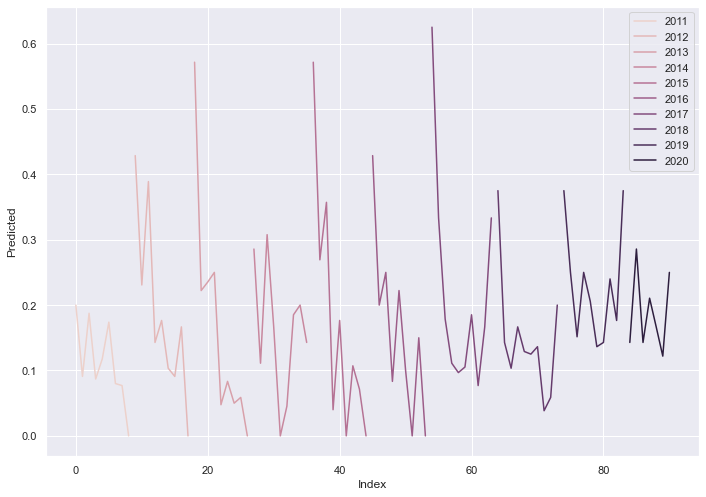

<Figure size 842.4x595.44 with 0 Axes>

In [31]:
sns.lineplot(x='Index',y='Predicted',hue='Year',data=GB)
plt.legend(labels=['2011', '2012','2013', '2014','2015', '2016','2017', '2018','2019', '2020'])
plt.show()
plt.savefig('./graphs/fig3.png')

In [17]:
GB.to_csv('pred_percentages_mothly_indexed.csv')

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
GB

Unnamed: 0  Predicted  Index
Year Month                               
2011 1         7.000000   0.200000      0
     3        36.500000   0.090909      1
     4        66.500000   0.187500      2
     5        86.000000   0.086957      3
     6       106.000000   0.117647      4
     7       126.000000   0.173913      5
     8       150.440000   0.080000      6
     9       168.153846   0.076923      7
     10      179.000000   0.000000      8
2012 1       186.000000   0.428571      9
     3       202.500000   0.230769     10
     4       224.500000   0.388889     11
     5       244.000000   0.142857     12
     6       263.000000   0.176471     13
     7       286.000000   0.103448     14
     8       312.318182   0.090909     15
     9       327.000000   0.166667     16
     10      337.500000   0.000000     17
2013 1       344.000000   0.571429     18
     3       361.000000   0.222222     19
     4       383.000000   0.235294     20
     5       401.500000   0.250000     21
     6       422.000000   0.047619     22
     7       444.666667   0.083333     23
     8       467.000000   0.050000     24
     9       484.176471   0.058824     25
     10      497.000000   0.000000     26
2014 1       504.000000   0.285714     27
     3       521.000000   0.111111     28
     4       541.000000   0.307692     29
     5       559.500000   0.166667     30
     6       582.000000   0.000000     31
     7       603.500000   0.045455     32
     8       628.962963   0.185185     33
     9       647.266667   0.200000     34
     10      660.000000   0.142857     35
2015 1       667.000000   0.571429     36
     3       683.500000   0.269231     37
     4       703.500000   0.357143     38
     5       723.000000   0.040000     39
     6       744.000000   0.176471     40
     7       763.000000   0.000000     41
     8       787.928571   0.107143     42
     9       807.642857   0.071429     43
     10      816.000000   0.000000     44
2016 1       820.000000   0.428571     45
     3       836.000000   0.200000     46
     4       856.500000   0.250000     47
     5       876.500000   0.083333     48
     6       897.500000   0.222222     49
     7       921.500000   0.100000     50
     8       944.333333   0.000000     51
     9       957.400000   0.150000     52
     10      969.000000   0.000000     53
2017 1       973.500000   0.625000     54
     2       980.500000   0.333333     55
     3       997.500000   0.178571     56
     4      1020.500000   0.111111     57
     5      1045.000000   0.096774     58
     6      1070.000000   0.105263     59
     7      1093.185185   0.185185     60
     8      1120.076923   0.076923     61
     9      1136.833333   0.166667     62
     10     1152.000000   0.333333     63
2018 1      1163.500000   0.375000     64
     2      1171.000000   0.142857     65
     3      1189.000000   0.103448     66
     4      1212.500000   0.166667     67
     5      1237.000000   0.129032     68
     6      1260.500000   0.125000     69
     7      1279.500000   0.136364     70
     8      1304.076923   0.038462     71
     9      1324.117647   0.058824     72
     10     1341.000000   0.200000     73
2019 1      1352.500000   0.375000     74
     2      1358.500000   0.250000     75
     3      1377.000000   0.151515     76
     4      1403.500000   0.250000     77
     5      1431.205882   0.205882     78
     6      1457.409091   0.136364     79
     7      1480.000000   0.142857     80
     8      1503.000000   0.240000     81
     9      1524.000000   0.176471     82
     10     1536.500000   0.375000     83
2020 1      1544.000000   0.142857     84
     2      1551.000000   0.285714     85
     3      1558.000000   0.142857     86
     8      1571.000000   0.210526     87
     9      1595.633333   0.166667     88
     10     1631.097561   0.121951     89
     11     1654.500000   0.250000     90